In [1]:
import json, glob, pycm, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='Predict', ylabel='Actual')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False positives"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False negatives"))
        display(df_fn_styler)

In [3]:
experiments = [ json.load(open(file, 'r')) for file in glob.glob('caligraph_experiments/*/gpt-4*') ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    } 
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
1,Player of American football from Alabama,1.00,High,100.0%,0,0,40
0,Newspaper in New South Wales,0.85,High,92.5%,2,1,40
2,England under-21 international footballer,0.80,High,90.0%,0,4,40
3,Autobiography,0.75,Tentative,87.5%,0,5,40


## Player of American football from Alabama (http://caligraph.org/ontology/Player_of_American_football_from_Alabama)

Player of American Football from Alabama:

(noun) An individual who actively participates in the sport of American football and is either a resident of the U.S. state of Alabama, was born in Alabama, or is affiliated with Alabama through education or professional sports. This can include high school, college (such as University of Alabama or Auburn University), or professional players (in the National Football League) who have a significant connection to Alabama. These players have knowledge of and engage in the rules and regulations of American football and have developed skills necessary for the sport such as passing, catching, tackling, and strategic playmaking.

### Confusion matrix

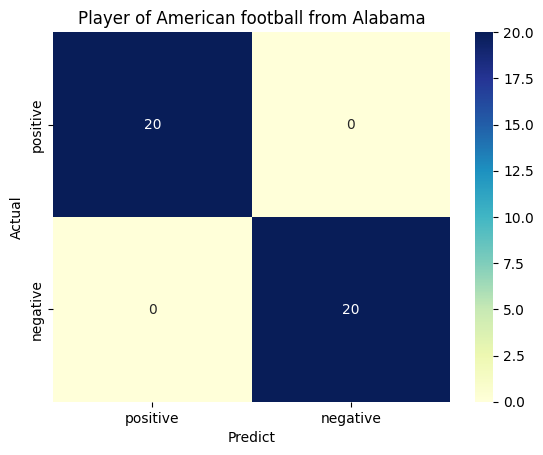

## Newspaper in New South Wales (http://caligraph.org/ontology/Newspaper_in_New_South_Wales)

Newspaper in New South Wales

Noun

A printed or digital publication that is periodically released, often daily or weekly, in the state of New South Wales, Australia. This publication contains a variety of content including news, features, opinions, and advertisements, primarily focusing on events and issues within New South Wales, but also covering national and international news. Examples include The Sydney Morning Herald, The Daily Telegraph, and The Australian.

### Confusion matrix

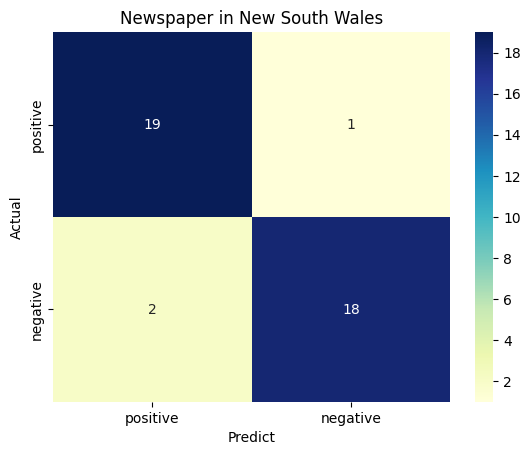

### False positives

label,description,rationale
Parramatta Advertiser,"The Parramatta Advertiser is a named individual and a newspaper published in Sydney, Australia. It is also known as dbr:Parramatta_Advertiser and has a preferred label of ""Parramatta Advertiser"". The format of the newspaper is tabloid and it is available both online and offline. The Parramatta Advertiser was founded on July 15, 1933 and its headquarters are located in Parramatta, Sydney, New South Wales, Australia. The newspaper is owned by NewsLocal and is categorized as a weekly newspaper. The Parramatta Advertiser was derived from the category Newspapers published in Sydney and from NewsLocal.","The Parramatta Advertiser fits the definition of a Newspaper in New South Wales as it is a publication that is periodically released, specifically on a weekly basis. It is published in the state of New South Wales, Australia, specifically in Parramatta, Sydney. The Parramatta Advertiser contains a variety of content, as is typical of newspapers, and is available in both printed and digital formats. Furthermore, it is a part of the category Newspapers published in Sydney, which is within New South Wales. Therefore, based on the provided definition and information, the Parramatta Advertiser can be classified as a Newspaper in New South Wales."
The Free Thought,"""The Free Thought"" is a Ukrainian-language newspaper that was first published in 1949 in Sydney, Australia. It is a non-English language publication established by a Ukrainian publisher and is considered a significant establishment of 1949 in Australia. The newspaper's circulation is reported at 1,500 copies and it follows the ISO 216 format. The newspaper, also known as ""Vil'na dumka"" or ""Vil`na Dumka,"" was founded on July 10, 1949, and its headquarters are located in Lidcombe, New South Wales, Australia. Apart from Ukrainian, the newspaper also features content in English.","""The Free Thought"" fits the definition of a Newspaper in New South Wales as it is a periodically released publication, specifically in a Ukrainian language, that was first published in Sydney, Australia, which is located in New South Wales. The newspaper's headquarters are also located in New South Wales, specifically in Lidcombe. While the content language is primarily Ukrainian, it also features content in English, indicating a variety of content. Although the definition does not specify the language of the newspaper, it does not exclude non-English publications. Therefore, based on the provided definition and information about ""The Free Thought,"" it can be argued that ""The Free Thought"" is a Newspaper in New South Wales."


### False negatives

label,description,rationale
Dubbo,"Dubbo is a city in Australia, specifically in New South Wales. It is characterized as a town or city in Australia, a college town, a town in the Central West of New South Wales, and a country rugby league club in New South Wales. The city has a population of 43,516. Notably, it is also the birthplace of numerous individuals including Tony Lawler, Pat Crawford, David Peachey, Luke Quigley, and many others. It is also the location of numerous entities, such as the Macquarie River railway bridge, the Milestone Hotel, and the Apex Oval. Several organizations, including the Daily Liberal and Air Link, have their headquarters in Dubbo. The city is also known for its Royal Australian Air Force installation and for being a place in New South Wales.","Based on the provided definitions, it is not possible to argue that Dubbo is a Newspaper in New South Wales. Dubbo is described as a city in New South Wales, Australia, not a printed or digital publication that is periodically released. While it is mentioned that the Daily Liberal, a newspaper, has its headquarters in Dubbo, this does not make the city itself a newspaper. Therefore, according to the given definitions, Dubbo cannot be classified as a Newspaper in New South Wales."


## England under-21 international footballer (http://caligraph.org/ontology/England_under-21_international_footballer)

"England Under-21 International Footballer" (noun):

1. A footballer who is officially selected and participates in football matches for England's national under-21 team. The age restriction implies the player is at most 21 years old, although they can still play if they turn 22 during the two-year European Championship campaign.
   
2. Typically, these players are recognized as having significant potential in the sport, and may either be emerging talents in the early stages of their professional careers or established players within the football leagues.

3. The selection of these players is based on their skill, performance, and adherence to the rules and regulations set by the Football Association, the governing body of football in England. 

4. Their primary objective is to represent England in international under-21 football competitions, such as the UEFA European Under-21 Championship. 

5. Being an England under-21 international footballer often serves as a stepping stone to being selected for England's senior national team.

### Confusion matrix

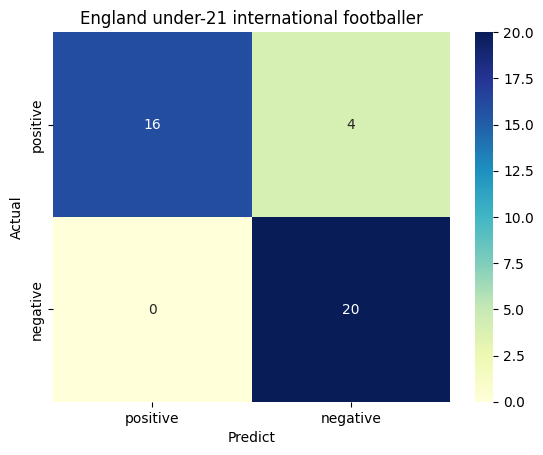

### False negatives

label,description,rationale
Patrick Bamford,"Patrick Bamford is a professional footballer born in September 5, 1993 in Grantham, Lincolnshire, England. He attended Nottingham High School and competes as a forward. Throughout his career, Bamford has played for multiple clubs including Nottingham Forest F.C., Norwich City F.C., Leeds United F.C., Milton Keynes Dons F.C., Derby County F.C., Middlesbrough F.C., Chelsea F.C., Burnley F.C., and Crystal Palace F.C. Notably, he has competed for both England's and Republic of Ireland's national under-19 football teams. Bamford is of Irish descent and has been recognized as a top Premier League goal scorer. He has also been awarded the number 9 jersey in his team lineups. In addition to his athletic achievements, Bamford is a recipient of Nike sponsorship.","The text does not provide sufficient information to assert that Patrick Bamford is an England under-21 international footballer. While it is mentioned that he has competed for England's national under-19 football team, there is no specific mention of him playing for the under-21 team. Therefore, based solely on the provided information, we cannot definitively categorize Patrick Bamford as an England under-21 international footballer."
Paul Gascoigne,"Paul Gascoigne (also known as ""Gazza"") is an English former professional footballer and football manager, born on May 27, 1967, in Gateshead, Tyne and Wear. He is best known for his time with clubs like Tottenham Hotspur F.C., Everton F.C., Newcastle United F.C., S.S. Lazio and Rangers F.C. Internationally, Gascoigne played for the England national football team and was a participant in the 1990 FIFA World Cup. Gascoigne also had a stint as a manager for Kettering Town F.C. and has been involved in various controversies, leading to his conviction for several crimes. He has been diagnosed with bipolar disorder and obsessive-compulsive disorder, and has been a victim of the News International phone-hacking scandal. Gascoigne has also authored autobiographical works, and has been featured in films like ""Bobby Robson: More Than a Manager"", ""Gascoigne"", and ""One Night in Turin"". His spouse is Sheryl Gascoigne and he is related to Regan Gascoigne.","The provided description does not provide sufficient information to argue that Paul Gascoigne is an England under-21 international footballer. While it is stated that Gascoigne played for the England national football team and participated in the 1990 FIFA World Cup, there is no specific mention of him playing for England's under-21 team. Therefore, based solely on the provided information, it cannot be asserted that Paul Gascoigne is an England under-21 international footballer."
"Gary Mills (footballer, born 1961)","Gary Mills (born November 11, 1961 in Northampton) is a former professional English footballer and current football manager. Mills had a versatile playing career, taking on the roles of both a defender and a midfielder. He played for several English teams, including Derby County F.C., Leicester City F.C., Notts County F.C., and Tamworth F.C. Mills also had a stint as an expatriate soccer player in the United States with the Seattle Sounders. His managerial career was equally diverse, with tenures at clubs such as Notts County F.C., Gateshead F.C., and York City F.C. In addition to his football career, Mills is also recognized as an English autobiographer.","The provided description of Gary Mills (footballer, born 1961) does not contain any information that would allow us to assert that he was an England under-21 international footballer. The description mentions that he was a professional English footballer and played for several English teams, but it does not specify whether he was ever selected for and participated in matches for England's national under-21 team. Therefore, based solely on the provided information, we cannot argue that Gary Mills was an England under-21 international footballer."
Ashley Cole,"Ashley Cole is

## Autobiography (http://caligraph.org/ontology/Autobiography)

Autobiography (noun):

1. A literary work about the author's own life, written by the author himself or herself. It is a self-narrated account of one's life experiences, achievements, failures, personal insights, and significant events.

2. Unlike a biography, which is a third-person narrative about someone's life, an autobiography is written from a first-person perspective, providing a subjective and intimate depiction of the author's life.

3. Autobiographies typically cover a significant portion of the author's life, although some may focus on specific themes or periods. They often include details about the author's background, personal life, career, relationships, and thoughts.

4. The truthfulness of an autobiography can be subjective, as it relies on the author's memory and personal interpretation of events.

### Confusion matrix

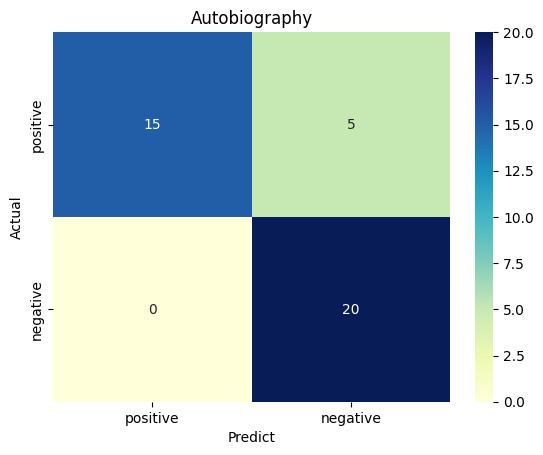

### False negatives

label,description,rationale
"Do You Want to Go With Me?"" (Willst du mit mir gehn","""Do You Want to Go With Me?"" (German: ""Willst du mit mir gehn"") is a named individual, identified within the realm of autobiographies. The title is recognized and preferred as ""Do You Want to Go With Me?\"" (Willst du mit mir gehn"". The piece is derived from a list of autobiographies featured in Wikipedia.","Based on the provided definition of an autobiography, ""Do You Want to Go With Me?"" (Willst du mit mir gehn) can be considered an autobiography if it is a literary work written by the author about their own life. This work would need to be a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It would be written from a first-person perspective, providing a subjective and intimate depiction of the author's life. The work would typically cover a significant portion of the author's life, although it may focus on specific themes or periods. It would include details about the author's background, personal life, career, relationships, and thoughts. The truthfulness of this work would be subjective, as it relies on the author's memory and personal interpretation of events."
And the Beat Goes On (The Whispers song),"""And the Beat Goes On"" is a song by The Whispers, released as a single in 1979 under the label SOLAR Records. The song is a part of the album 'The Whispers'. It falls under the genres of Dance-pop, Rhythm and blues, Post-disco, and Dance music. The song was written by Leon Sylvers III and produced by Dick Griffey and The Whispers. It has a runtime of 450.0 and 270.0 seconds. The song achieved significant success, becoming a UK top-ten single in 1980. It has alternative labels such as ""And The Beat Goes On"". The song is derived from various sources including 'The Whispers' and 'The Whispers (album)'. The song that preceded ""And the Beat Goes On"" in The Whispers' discography is ""Rock Steady"".","Based on the provided definition and information, there is no evidence to support the assertion that ""And the Beat Goes On"" by The Whispers is an autobiography. The song is a creative work, but it does not fit the definition of an autobiography as it is not a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It is not written from a first-person perspective about the author's life, nor does it cover a significant portion of the author's life or focus on specific themes or periods in their life. Therefore, ""And the Beat Goes On"" cannot be classified as an autobiography."
Anna Sui (2009 book),"""Anna Sui (2009 book)"" is a non-fiction, autobiographical book authored by Susan Muaddi Darraj. The book, categorized under the genres of Biography and Non-fiction, specifically explores the subject of fashion design. Published by Infobase Publishing, the book has a total of 120 pages and comes in a paperback format. The book carries the ISBN number 9781438128641. The book is derived from various sources, mainly encompassing books by publishing companies from different countries and books by various topics, types, genres, and writers.","Based on the provided definition and information, it is not possible to argue that ""Anna Sui (2009 book)"" is an autobiography. The definition of an autobiography states that it is a literary work about the author's own life, written by the author himself or herself. However, ""Anna Sui (2009 book)"" is authored by Susan Muaddi Darraj, not Anna Sui. Therefore, it does not meet the criteria of an autobiography as defined above."
Nine Lives (2005 film),"""Nine Lives"" is a 2005 English-language film directed by Rodrigo García. This American anthology film is a drama that takes place within a single day and features a large cast, including Ian McShane, Sissy Spacek, K Callan, Mary Kay Place, Elpidia Carrillo, Miguel Sandoval, Glenn Close, Joe Mantegna, Dakota Fanning, 

In [5]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)